In [1]:
import os
import re
import glob

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sys  
sys.path.insert(0, '../')

from filter_files import get_filenames


import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

### Concatenate all the files

Get the original data from files used in `testing` all the models and the reconstructed files \
from the predicted parameters of different models listed below and concatenate them into one file.
1. Original data
2. random forest model
3. xgboost model
4. tuned xgboost model
5. NN model


In [2]:
def get_original_and_reconstructed_data(path, filename, path_type):
    """
    Get the original and reconstructed data from the files.
    """
    
    #  get the original data with the correct indices used in the training data
    filenames = get_filenames(path)
    orig_files = [os.path.join(path, f) for f in filenames]

    # get the reconstructed data from the predicted parameters
    recon_files = glob.glob(path + 'recon_param_data*.txt') # not sorted
    sorted_recon_files = recon_files.sort(key=lambda f: int(re.sub('\D', '', f))) # for some reason, it works by sorting recon_files but doesnt store the files
    # recon_files = sorted(glob.glob(path + 'recon_param_data*.txt'), key=lambda x: int(re.search(r'\d+', x).group())) # normally, this works but atm its not sorting the files for some unknown reason

    write_data = open(PARAMETERS_OUTPUT + filename, 'w')

    # read in all files
    if path_type == 'orig':
        for file in orig_files:
            with open(file, 'r') as f:
                # skip the first 10 lines in each file
                for line in range(10):
                    f.readline()
                # read in the data from each file
                data = f.readlines()
                # write the data to the output file in the same order as the files
                for line in range(len(data)):
                    write_data.write(data[line])
    elif path_type == 'recon':
        for file in recon_files:
            with open(file, 'r') as f:
                # skip the first 10 lines in each file
                for line in range(10):
                    f.readline()
                # read in the data from each file
                data = f.readlines()
                # write the data to the output file in the same order as the files
                for line in range(len(data)):
                    write_data.write(data[line])
    else:
        print('path_type must be orig or recon')
        return
    # close the files
    write_data.close()

1. Original data

In [3]:
PARAMETERS_OUTPUT = '../data/synthetic/params/'

PATH = '../data/synthetic/spectra/simulated_data/'
original_data = get_original_and_reconstructed_data(PATH, 'model_parameters_data_filtered.txt', 'orig')

2. Random forest model

In [4]:
# get path to all files
RF_RECONSTRUCTED_PATH = '../data/synthetic/spectra/reconstructed/rf/'
rf = get_original_and_reconstructed_data(RF_RECONSTRUCTED_PATH, 'reconstructed_data_rf.txt', 'recon')

3. Xgboost model

In [5]:
# get path to all files
XGB_RECONSTRUCTED_PATH = '../data/synthetic/spectra/reconstructed/xgb/'
xgb = get_original_and_reconstructed_data(RF_RECONSTRUCTED_PATH, 'reconstructed_data_xgb.txt', 'recon') 

4. Tuned xgboost model

In [6]:
# get path to all files
XGB_TUNED_RECONSTRUCTED_PATH = '../data/synthetic/spectra/reconstructed/xgb_tuned/'
tuned_xgb = get_original_and_reconstructed_data(XGB_TUNED_RECONSTRUCTED_PATH, 'reconstructed_data_xgb_tuned.txt', 'recon')

5. NN model

In [7]:
# get path to all files
NN_MODEL_RECONSTRUCTED_PATH = '../data/synthetic/spectra/reconstructed/nn_model/'
# tuned_xgb = get_original_and_reconstructed_data(NN_MODEL_RECONSTRUCTED_PATH, 'reconstructed_data_nn_model.txt', 'recon')

#### Load the files 

In [19]:
# load the original data
df_signal = pd.read_csv(PARAMETERS_OUTPUT + 'model_parameters_data_filtered.txt', sep=' ', header=None) # all reconstructed original data dataframes
df_signal = df_signal[(df_signal.iloc[:, 0] >= 238.91) & (df_signal.iloc[:, 1]  <= 239.18)]


In [20]:

# concatenated data for all the models 
df_recon_rf = pd.read_csv(PARAMETERS_OUTPUT + 'reconstructed_data_rf.txt', sep=' ', header=None) # all reconstructed original data dataframes
df_recon_xgb = pd.read_csv(PARAMETERS_OUTPUT + 'reconstructed_data_xgb.txt', sep=' ', header=None) # all reconstructed original data dataframes
df_recon_tuned_xgb = pd.read_csv(PARAMETERS_OUTPUT + 'reconstructed_data_xgb_tuned.txt', sep=' ', header=None) # all reconstructed original data dataframes
# df_recon_nn_model = pd.read_csv(PARAMETERS_OUTPUT + 'reconstructed_data_nn_model.txt', sep=' ', header=None) 

In [21]:
df_signal.shape, df_recon_rf.shape, df_recon_xgb.shape, df_recon_tuned_xgb.shape

# df_signal.shape, df_recon_nn_model.shape

((243000000, 2), (240300000, 2), (240300000, 2), (240300000, 2))

In [22]:
columns = ['Frequency', 'Intensity']

# name the columns
df_signal.columns = columns
# df_signal_tree.columns = columns # tree model original data
# df_signal_nn.columns = columns # nn model original data
df_recon_rf.columns =  columns 
df_recon_xgb.columns =  columns
df_recon_tuned_xgb.columns =  columns
# df_recon_nn_model.columns =  columns

In [23]:
# get the reconstructed files for the rf model
recon_files = glob.glob(RF_RECONSTRUCTED_PATH + 'recon_param_data*.txt') 

freq_sig = np.array(np.array_split(df_signal['Frequency'], len(recon_files)))
inten_sig = np.array(np.array_split(df_signal['Intensity'], len(recon_files)))

# get the frequency and intensity of the rf model
rf_freq_recon = np.array(np.array_split(df_recon_rf['Frequency'], len(recon_files)))
rf_inten_recon = np.array(np.array_split(df_recon_rf['Intensity'], len(recon_files)))

# get the frequency and intensity of the rf model
xgb_freq_recon = np.array(np.array_split(df_recon_xgb['Frequency'], len(recon_files)))
xgb_inten_recon = np.array(np.array_split(df_recon_xgb['Intensity'], len(recon_files)))

# get the frequency and intensity of the rf model
tuned_xgb_freq_recon = np.array(np.array_split(df_recon_tuned_xgb['Frequency'], len(recon_files)))
tuned_xgb_inten_recon = np.array(np.array_split(df_recon_tuned_xgb['Intensity'], len(recon_files)))


In [24]:
# get the  signal index for the filtered signals
filename_index = [int(re.search(r'\d+', f).group()) for f in get_filenames(PATH)]
signal_index = []
for i in range(len(recon_files)):
    signal_index += [filename_index[i]]

In [25]:
def reconstructed_plots(spectral_index, signal_index):
    """
    Plot the reconstructed spectra.
    """
    # plot the original signal
    plt.figure(figsize=(15,9))
    sns.set_style('whitegrid')
    # use inferno color map for the 4 lines plots to make them more visi
    cm = plt.get_cmap('inferno')

    

    plt.plot(freq_sig[spectral_index], inten_sig[spectral_index], color='blue',  label= 'Original Signal ' + str(signal_index[spectral_index]))
    plt.plot(rf_freq_recon[spectral_index], rf_inten_recon[spectral_index], color='red', label='Reconstructed RF model Signal ' + str(signal_index[spectral_index]))
    plt.plot(xgb_freq_recon[spectral_index], xgb_inten_recon[spectral_index], color='black',  label='Reconstructed XGB model Signal ' + str(signal_index[spectral_index]))
    plt.plot(tuned_xgb_freq_recon[spectral_index], tuned_xgb_inten_recon[spectral_index], color='green', label='Reconstructed tuned XGB model Signal ' + str(signal_index[spectral_index]))
    # plt.plot(nn_model_freq_recon[spectral_index], nn_model_inten_recon[spectral_index], color='orange', label='Reconstructed NN model Signal ' + str(signal_index[spectral_index]))
    plt.legend(loc='upper right')
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Intensity (K)')
    
    plt.legend(loc='best')

    
    return plt.show()

In [50]:
def reconstructed_subplots(spectral_index, signal_index, ml_model_type):
    '''
    plot subplots of the reconstructed spectra
    '''

    fig, axes = plt.subplots(3, 2, figsize=(25,23))
    sns.set_style('whitegrid')
    # use inferno color map for the 4 lines plots to make them more visi
    cm = plt.get_cmap('inferno')
    # fig.tight_layout()
    # use inferno color map for the 4 lines plots to make them more visi
    # plot sublpots of 6 signals
    for i in range(6):
        if ml_model_type == 'rf':
            axes[i//2, i%2].plot(freq_sig[i], inten_sig[i], color='blue',  label= 'Synthetic Signal ' + str(signal_index[i]))
            axes[i//2, i%2].plot(rf_freq_recon[i], rf_inten_recon[i], color='red', label='Reconstructed Signal (RF) ' + str(signal_index[i]))

        elif ml_model_type == 'xgb':  
            axes[i//2, i%2].plot(freq_sig[i], inten_sig[i], color='blue',  label= 'Synthetic Signal ' + str(signal_index[i]))
            axes[i//2, i%2].plot(xgb_freq_recon[i], xgb_inten_recon[i], color='purple',  label='Reconstructed Signal (XGB) ' + str(signal_index[i]))
        
        elif ml_model_type == 'tuned_xgb':
            axes[i//2, i%2].plot(freq_sig[i], inten_sig[i], color='blue',  label= 'Synthetic Signal ' + str(signal_index[i]))
            axes[i//2, i%2].plot(tuned_xgb_freq_recon[i], tuned_xgb_inten_recon[i], color='green',  label='Reconstructed Signal (XGB tuned) ' + str(signal_index[i]))
        
        elif ml_model_type == 'all':
            axes[i//2, i%2].plot(freq_sig[i], inten_sig[i], color='blue',  label= 'Synthetic Signal ' + str(signal_index[i]))
            axes[i//2, i%2].plot(rf_freq_recon[i], rf_inten_recon[i], color='red', label='Reconstructed Signal (RF) ' + str(signal_index[i]))
            axes[i//2, i%2].plot(xgb_freq_recon[i], xgb_inten_recon[i], color='purple',  label='Reconstructed Signal (XGB) ' + str(signal_index[i]))
            axes[i//2, i%2].plot(tuned_xgb_freq_recon[i], tuned_xgb_inten_recon[i], color='green',  label='Reconstructed Signal (XGB tuned) ' + str(signal_index[i]))

        else:
            ValueError('ml_model_type must be either rf, xgb, tuned_xgb, or all')

        
        axes[i//2, i%2].set_xlabel('Frequency (GHz)', fontsize=20)
        axes[i//2, i%2].set_ylabel('Intensity (K)', fontsize=20)
        axes[i//2, i%2].legend(loc='best', fontsize=20)

        # increase the tick size for the subplots
        for tick in axes[i//2, i%2].xaxis.get_major_ticks():
            tick.label.set_fontsize(20)
        for tick in axes[i//2, i%2].yaxis.get_major_ticks():
            tick.label.set_fontsize(20)

        # remove grid lines for the subplots
        axes[i//2, i%2].grid(False)

    # plt.tight_layout()


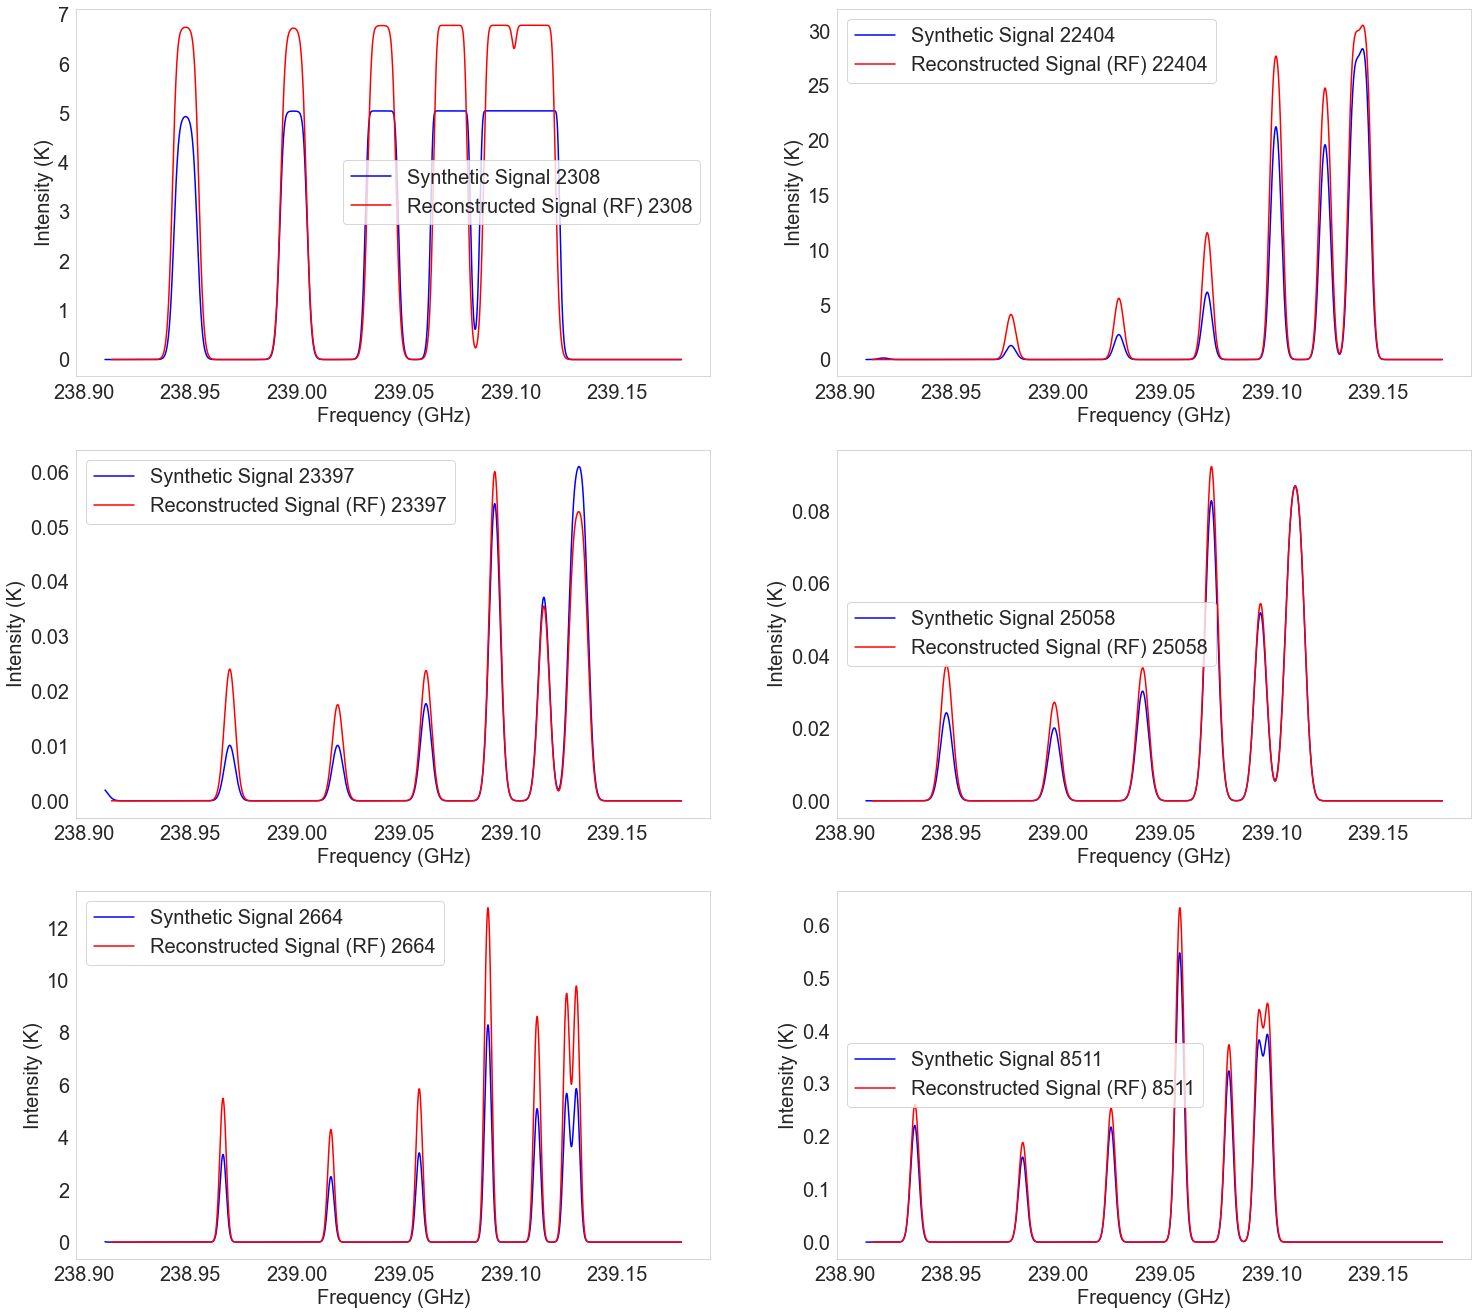

In [51]:
RECONSTRUCTED_PATH_OUTPUT = '../data/synthetic/reconstructed_files/'

if not os.path.exists(RECONSTRUCTED_PATH_OUTPUT):
            os.makedirs(RECONSTRUCTED_PATH_OUTPUT)

spectral_index = range(6)    
reconstructed_subplots(spectral_index, signal_index, 'rf')
plt.savefig(RECONSTRUCTED_PATH_OUTPUT + 'reconstructed_spectra_RF.pdf', dpi=100)
# plt.close()

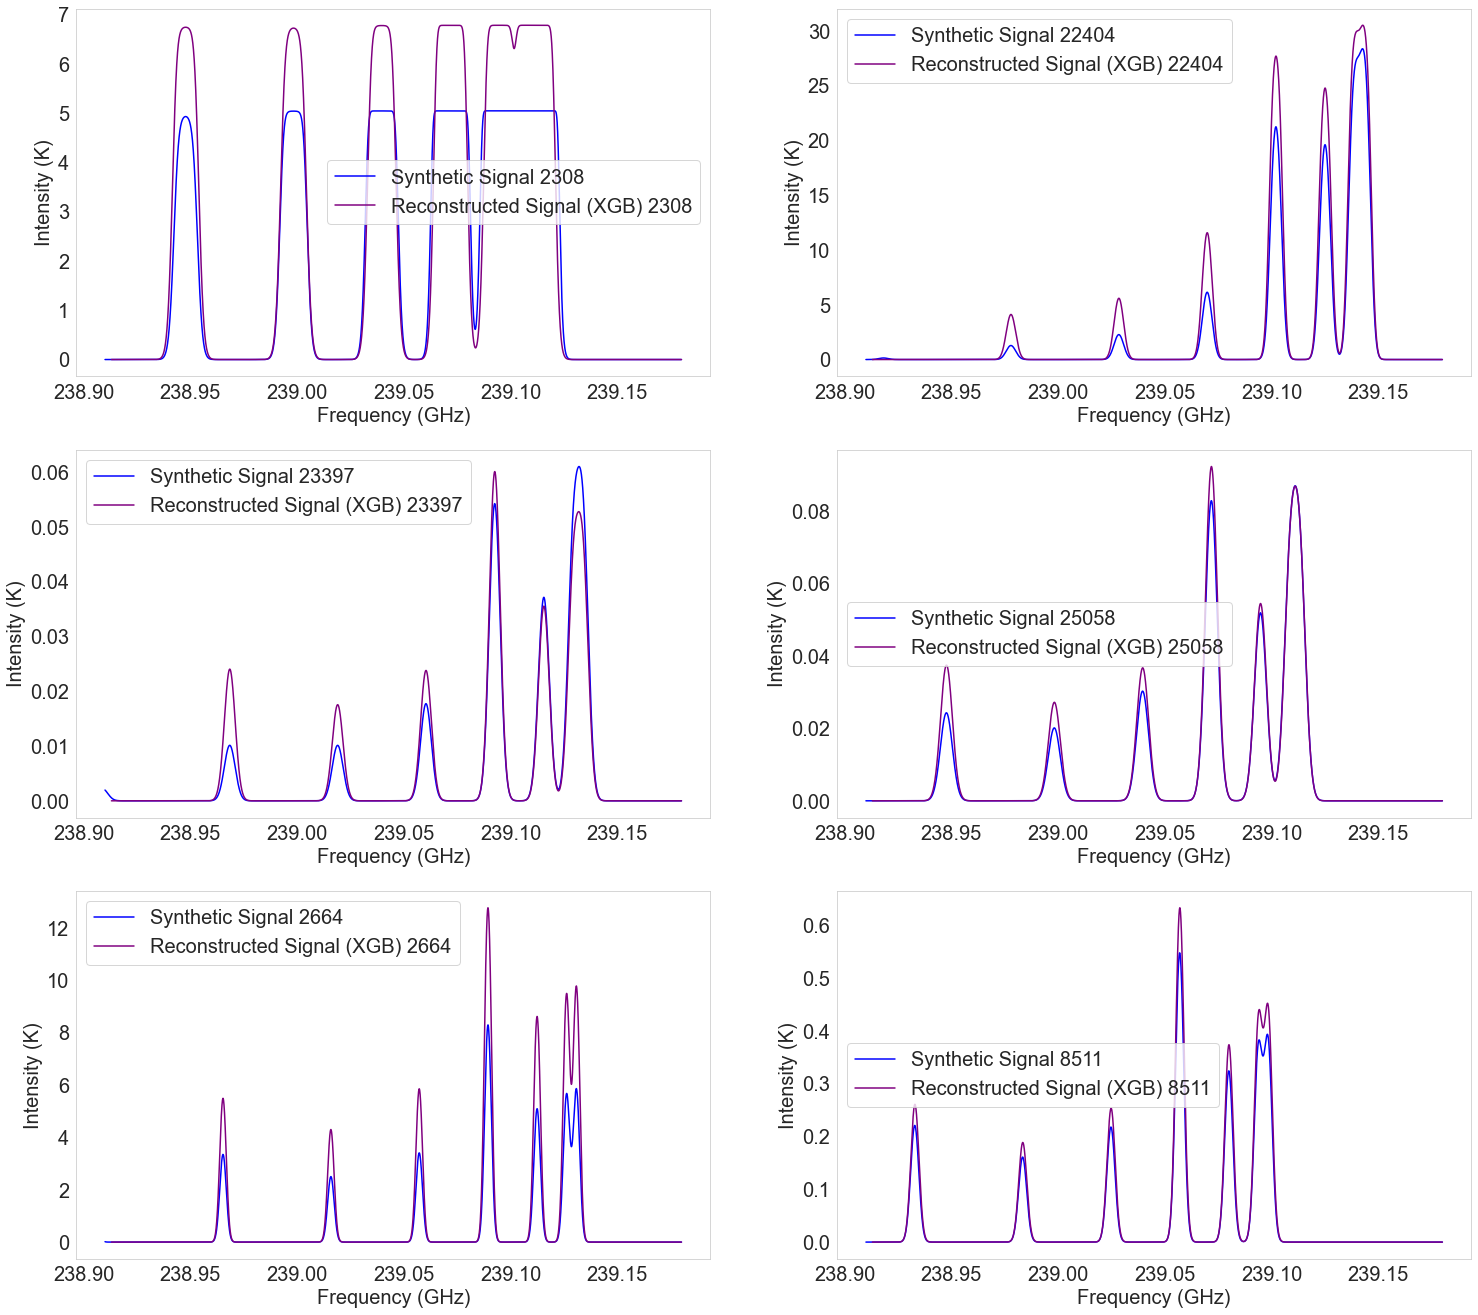

In [52]:
spectral_index = range(6)    
reconstructed_subplots(spectral_index, signal_index, 'xgb')
plt.savefig(RECONSTRUCTED_PATH_OUTPUT + 'reconstructed_spectra_xgb.pdf', dpi=100)
# plt.close()

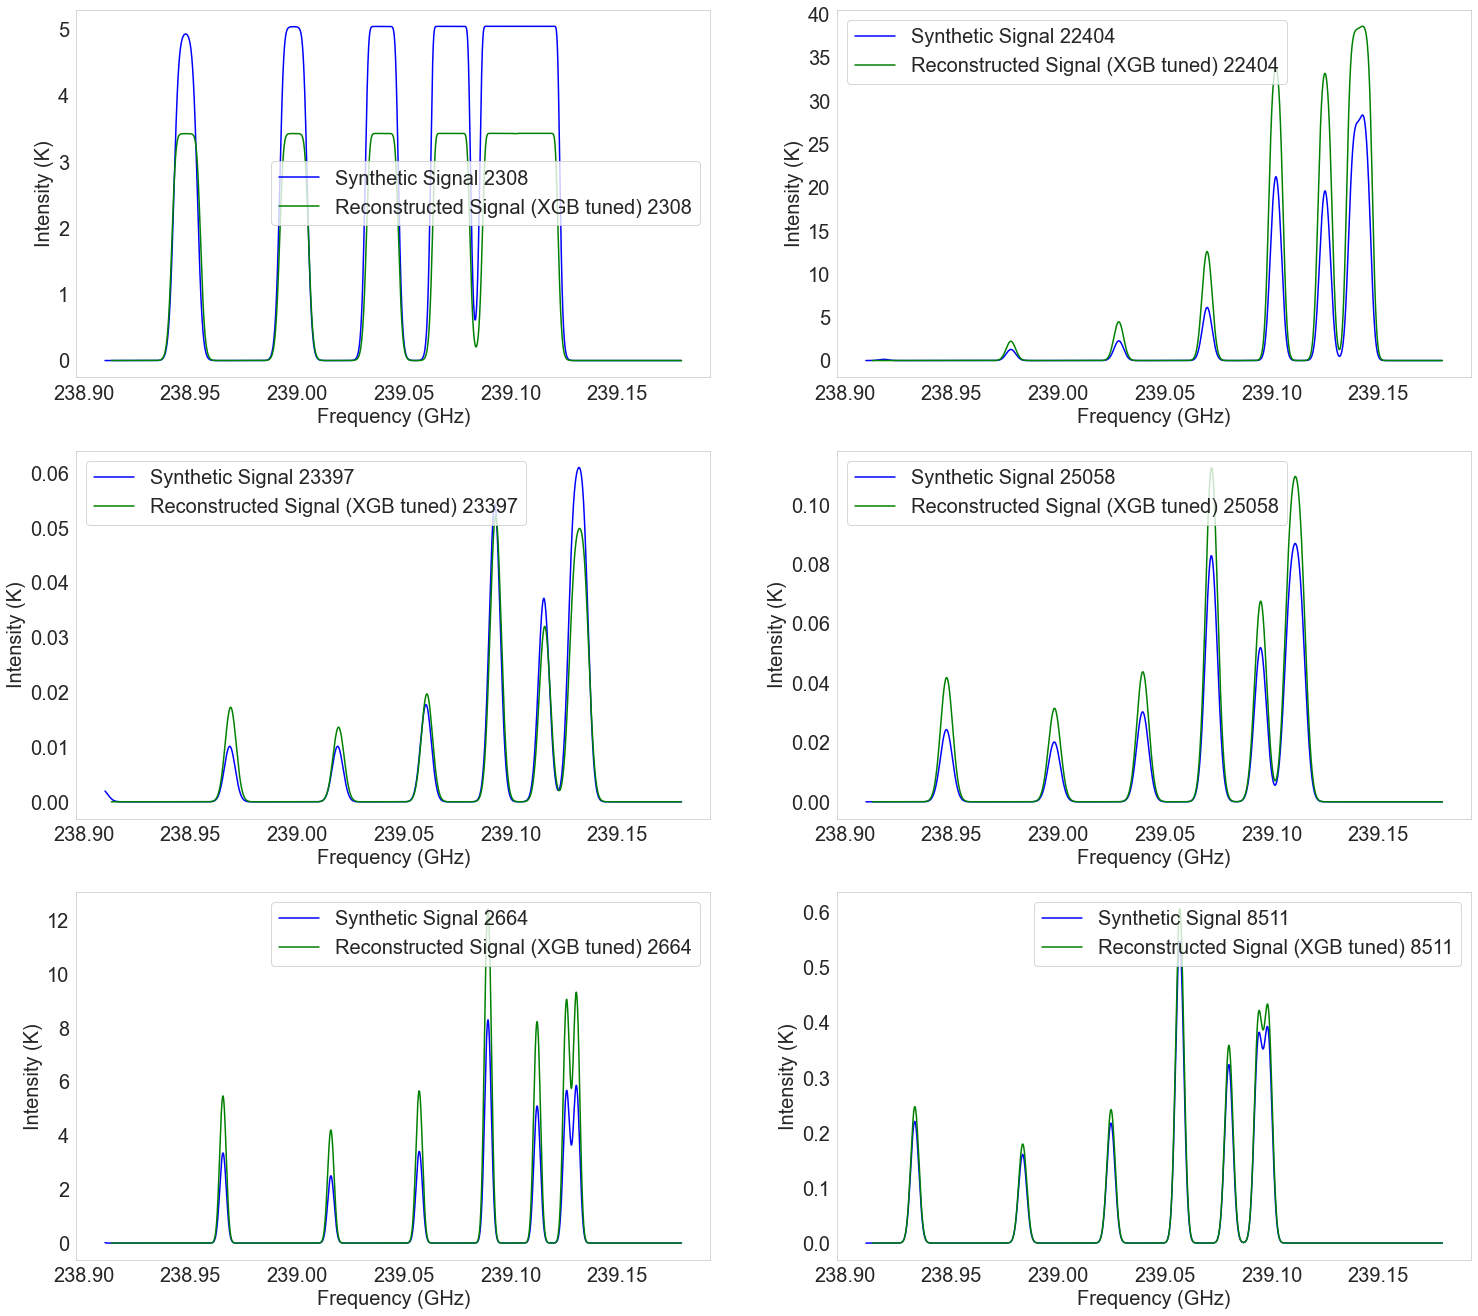

In [53]:
spectral_index = range(6)    
reconstructed_subplots(spectral_index, signal_index, 'tuned_xgb')
plt.savefig(RECONSTRUCTED_PATH_OUTPUT + 'reconstructed_spectra_xgb_tuned.pdf', dpi=100)
# plt.close()

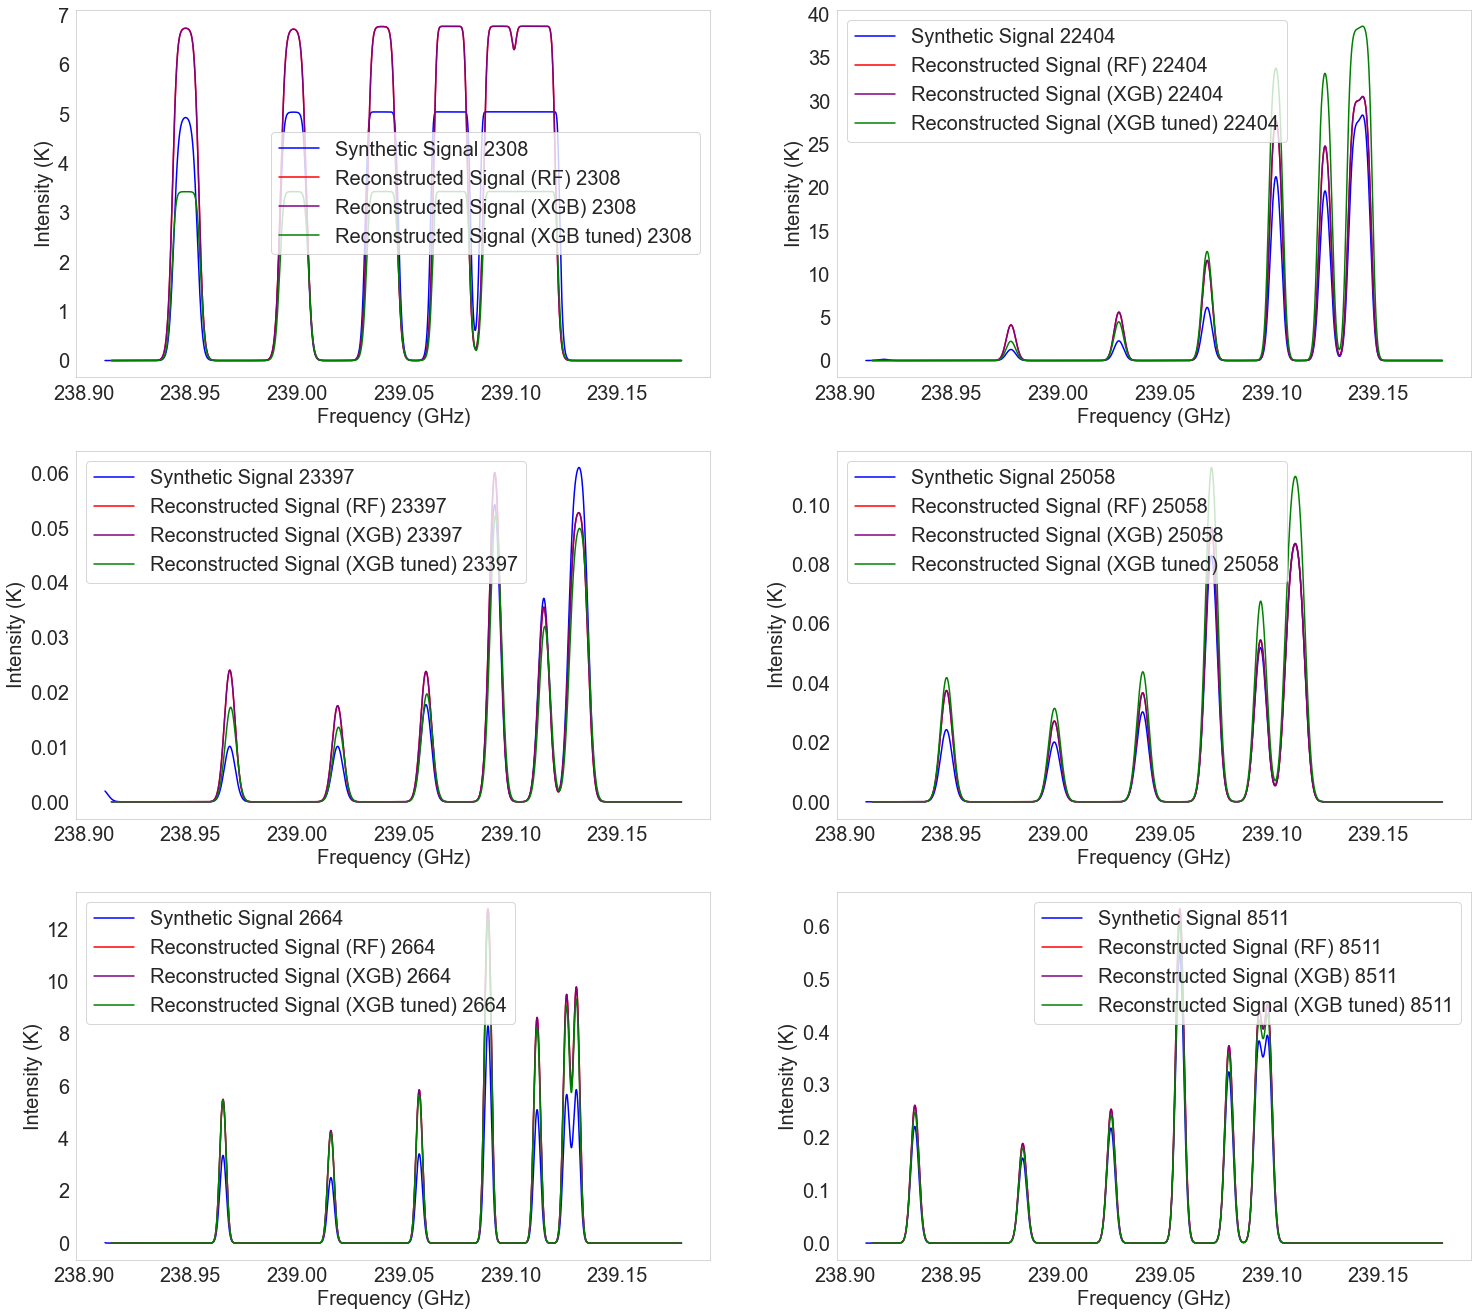

In [54]:
spectral_index = range(6)    
reconstructed_subplots(spectral_index, signal_index, 'all')
plt.savefig(RECONSTRUCTED_PATH_OUTPUT + 'reconstructed_spectra_all.pdf', dpi=100)
# plt.close()

In [ ]:
spectral_index = 0
reconstructed_plots(spectral_index, signal_index)

In [ ]:
spectral_index = 1
reconstructed_plots(spectral_index, signal_index)

In [ ]:
spectral_index = 2
reconstructed_plots(spectral_index, signal_index)

In [ ]:
spectral_index = 3
reconstructed_plots(spectral_index, signal_index)

In [ ]:
spectral_index = 161
reconstructed_plots(spectral_index, signal_index)

In [ ]:
spectral_index = 1000
reconstructed_plots(spectral_index, signal_index)

In [ ]:
spectral_index = 1237
reconstructed_plots(spectral_index, signal_index)

In [ ]:
spectral_index = 1260
reconstructed_plots(spectral_index, signal_index)

In [ ]:
spectral_index = 856
reconstructed_plots(spectral_index, signal_index)

In [ ]:
spectral_index = 300
reconstructed_plots(spectral_index, signal_index)

In [ ]:
spectral_index = 199
reconstructed_plots(spectral_index, signal_index)

In [ ]:
spectral_index = 299
reconstructed_plots(spectral_index, signal_index)

In [ ]:
spectral_index = 399
reconstructed_plots(spectral_index, signal_index)

In [ ]:
spectral_index = 1267
reconstructed_plots(spectral_index, signal_index)

In [ ]:
spectral_index = 2999
reconstructed_plots(spectral_index, signal_index)


In [ ]:
for spectral_index in np.random.choice(range(len(signal_index)), 10):
    reconstructed_plots(spectral_index, signal_index)